In [1]:
using Random
using Plots
using SymPy
using LinearAlgebra
using LaTeXStrings


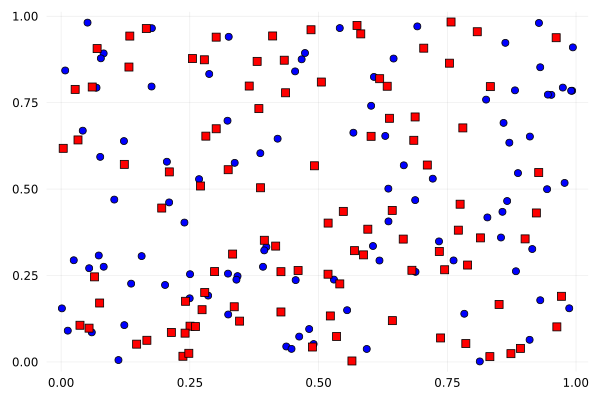

In [19]:
x1s = [rand(2) for i in 1:50]
x2s = [rand(2) for i in 1:50]
scatter(x1s,x2s, color="blue", legend=false)

y1s = [rand(2) for i in 1:50]
y2s = [rand(2) for i in 1:50]
scatter!(y1s,y2s, color="red", markershape=:square, legend=false, axis=false)

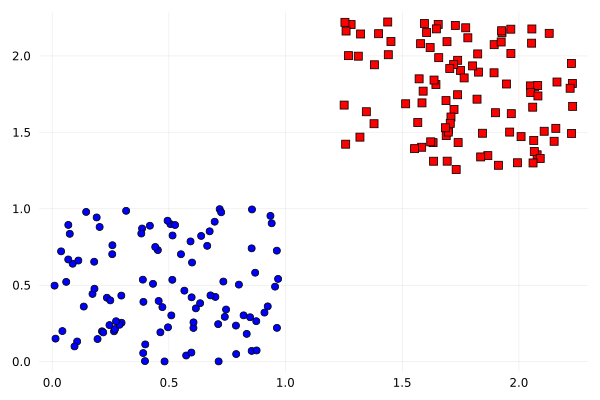

In [20]:
x1s = [rand(2) for i in 1:50]
x2s = [rand(2) for i in 1:50]
scatter(x1s,x2s, color="blue", legend=false)

y1s = [rand(2) .+ 1.25 for i in 1:50]
y2s = [rand(2) .+ 1.25 for i in 1:50]
scatter!(y1s,y2s, color="red", legend=false, markershape=:square, axis=false)

In [2]:
r = Sym("r")

r

In [3]:
LW = 2

2

In [4]:
N = 1000
x_vecs = [rand(3) for i in 1:N]
y_vecs = [rand(3) for i in 1:N]

disp_mat = zeros(N,N)
for i in 1:N
    for j in 1:N
        disp_mat[i,j] = norm(x_vecs[i]-y_vecs[j])
    end
end

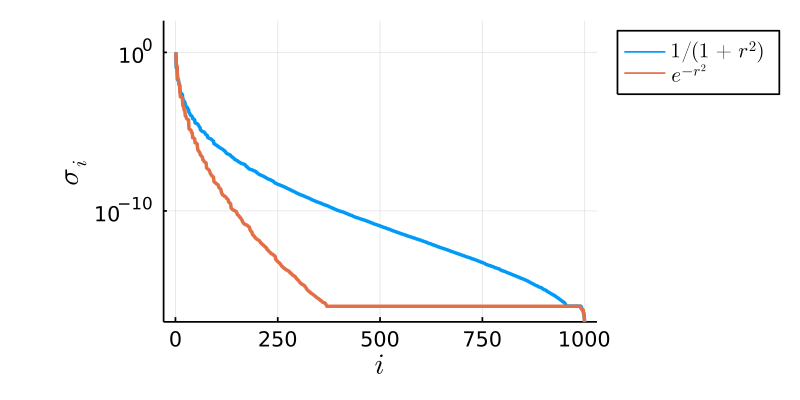

In [7]:
cauchy_kern = lambdify(1.0/(1.0+r^2))
gauss_kern  = lambdify(exp(-r^2))
exp_kern    = lambdify(exp(-r))

cauchy_mat = cauchy_kern.(disp_mat)
gauss_mat  = gauss_kern.(disp_mat)
exp_mat    = exp_kern.(disp_mat)

_, cauchy_svals = svd(cauchy_mat)
_, gauss_svals  = svd(gauss_mat)
_, exp_svals    = svd(exp_mat)

plot(1:N, cauchy_svals/cauchy_svals[1], yscale=:log10, ylim = (1e-17, 100), label=L"1/(1+r^2)", linewidth=LW,
xlabel = L"i", ylabel=L"\sigma_i")
plot!(1:N, gauss_svals/gauss_svals[1], yscale=:log10, ylim = (1e-17, 100), label=L"e^{-r^2}", 
     legend=:outertopright, size=(800,400), thickness_scaling = 1.75,linewidth=LW)
# plot!(1:N, exp_svals, yscale=:log10, ylim =(1e-17, 100), label=L"e^{-r}",
#      linewidth=LW)


In [72]:
N = 1000
x_vecs = [rand(3) for i in 1:N]
y_vecs = [rand(3) .+ 0.75 for i in 1:N]

disp_mat = zeros(N,N)
for i in 1:N
    for j in 1:N
        disp_mat[i,j] = norm(x_vecs[i]-y_vecs[j])
    end
end

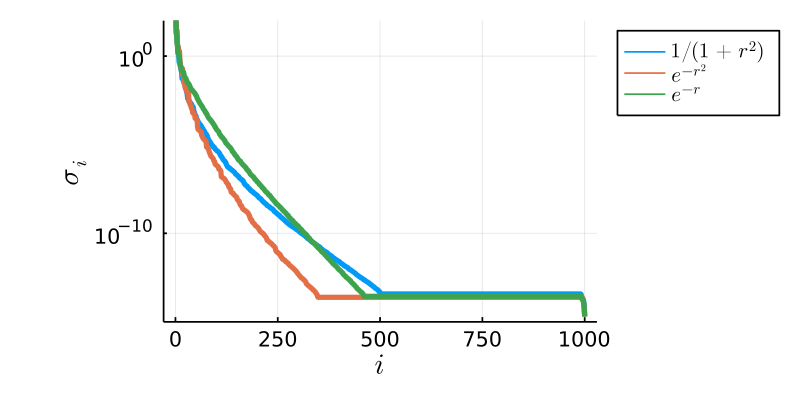

In [73]:
cauchy_kern = lambdify(1.0/(1.0+r^2))
gauss_kern  = lambdify(exp(-r^2))
exp_kern    = lambdify(exp(-r))

cauchy_mat = cauchy_kern.(disp_mat)
gauss_mat  = gauss_kern.(disp_mat)
exp_mat    = exp_kern.(disp_mat)

_, cauchy_svals = svd(cauchy_mat)
_, gauss_svals  = svd(gauss_mat)
_, exp_svals    = svd(exp_mat)

plot(1:N, cauchy_svals/cauchy_svals[1], yscale=:log10, ylim = (1e-17, 100), label=L"1/(1+r^2)",
xlabel = L"i", ylabel=L"\sigma_i", linewidth=LW)
plot!(1:N, gauss_svals/gauss_svals[1], yscale=:log10, ylim = (1e-17, 100), label=L"e^{-r^2}", linewidth=LW)
plot!(1:N, exp_svals/exp_svals[1], yscale=:log10, ylim = (1e-17, 100), label=L"e^{-r}",
    legend=:outertopright, size=(800,400), thickness_scaling = 1.75, linewidth=LW)


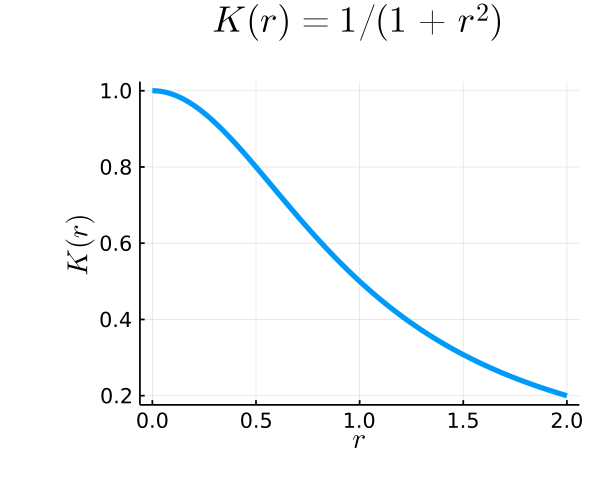

In [88]:
xs =collect(0:0.01:2)
cauchy_vals = cauchy_kern.(xs) 
gauss_vals = gauss_kern.(xs) 
exp_vals = exp_kern.(xs) 

plot(xs,cauchy_vals,size=(600,500), thickness_scaling = 1.75, linewidth=LW, label=false,title=L"K(r)=1/(1+r^2)",ylabel=L"K(r)",xlabel=L"r")

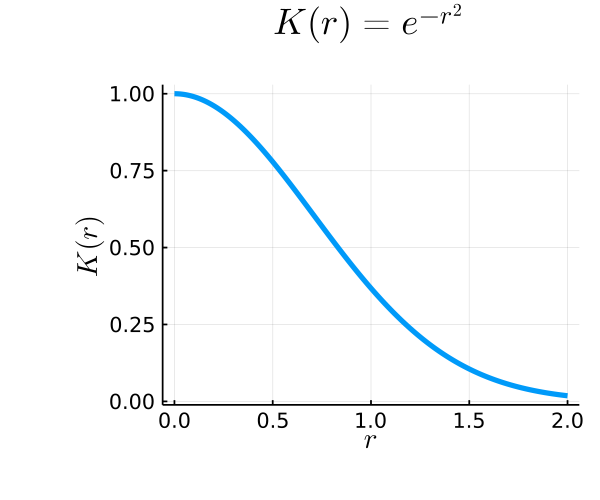

In [89]:
plot(xs,gauss_vals,size=(600,500), thickness_scaling = 1.75,label=false, linewidth=LW, title=L"K(r)=e^{-r^2}",ylabel=L"K(r)",xlabel=L"r")

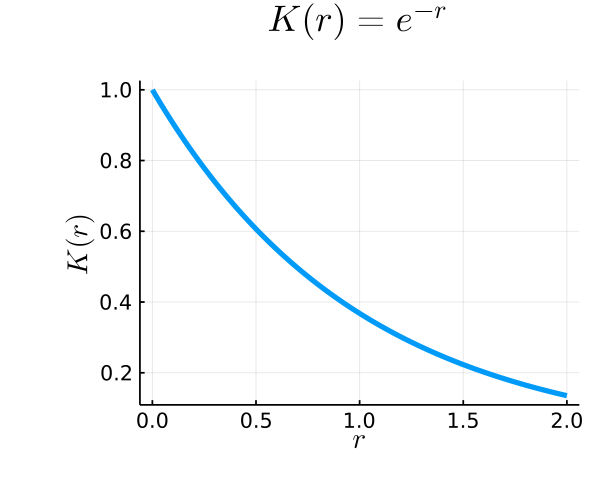

In [91]:
plot(xs,exp_vals,size=(600,500), thickness_scaling = 1.75,label=false, linewidth=LW, title=L"K(r)=e^{-r}",ylabel=L"K(r)",xlabel=L"r")